In [1]:
from speechbrain.inference.speaker import SpeakerRecognition
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")
score, prediction = verification.verify_files("HeyTVSWakeword/sunamdha/1.wav", "HeyTVSWakeword/sunamdha/2.wav") # Same Speaker
score

c:\Users\ITinframanage\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ITinframanage\AppData\Local\Programs\Python\Python312\Lib\site-packages\speechbrain\utils\parameter_transfer.py:234: UserWarning: Requested Pretrainer collection using symlinks on Windows. This might not work; see `LocalStrategy` documentation. Consider unsetting `collect_in` in Pretrainer to avoid symlinking altogether.
  warnings.warn(


tensor([0.7356])

In [2]:
import noisereduce as nr
import librosa
import soundfile as sf
from speechbrain.inference.speaker import SpeakerRecognition

# Paths
input_file_1 = "HeyTVSWakeword/sunamdha/1.wav"
input_file_2 = "HeyTVSWakeword/sunamdha/2.wav"
cleaned_file_1 = "1_clean.wav"
cleaned_file_2 = "2_clean.wav"

# Function to apply noise reduction and save output
def denoise_wav(input_path, output_path):
    y, sr = librosa.load(input_path, sr=16000)  # load with target SR
    reduced_noise = nr.reduce_noise(y=y, sr=sr)
    sf.write(output_path, reduced_noise, sr)

# Apply denoising to both files
denoise_wav(input_file_1, cleaned_file_1)
denoise_wav(input_file_2, cleaned_file_2)

# Load model and perform verification on cleaned audio
verification = SpeakerRecognition.from_hparams(
    source="speechbrain/spkrec-ecapa-voxceleb",
    savedir="pretrained_models/spkrec-ecapa-voxceleb"
)

score, prediction = verification.verify_files(cleaned_file_1, cleaned_file_2)
print("Score after denoising:", score.item())


c:\Users\ITinframanage\AppData\Local\Programs\Python\Python312\Lib\inspect.py:1004: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  if ismodule(module) and hasattr(module, '__file__'):
c:\Users\ITinframanage\AppData\Local\Programs\Python\Python312\Lib\site-packages\speechbrain\utils\parameter_transfer.py:234: UserWarning: Requested Pretrainer collection using symlinks on Windows. This might not work; see `LocalStrategy` documentation. Consider unsetting `collect_in` in Pretrainer to avoid symlinking altogether.
  warnings.warn(


Score after denoising: 0.7194311618804932


In [7]:
import os
import pandas as pd
import librosa
import soundfile as sf
import noisereduce as nr
from speechbrain.inference.speaker import SpeakerRecognition
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# # Load speaker verification model
# verification = SpeakerRecognition.from_hparams(
#     source="speechbrain/spkrec-ecapa-voxceleb",
#     savedir="app/Server/pretrained_models/spkrec-ecapa-voxceleb"
# )

# Directories
original_dir = "./HeyTVSWakeword/sunamdha"
denoised_dir = "./HeyTVSWakeword/sunamdhadenoise"
os.makedirs(denoised_dir, exist_ok=True)

# Function to apply noise reduction and save output
def denoise_wav(input_path, output_path):
    y, sr = librosa.load(input_path, sr=16000)
    reduced_noise = nr.reduce_noise(y=y, sr=sr)
    sf.write(output_path, reduced_noise, sr)

# Avoid redundant reprocessing
processed_denoise = set()

def ensure_denoised(file_name):
    if file_name not in processed_denoise:
        input_path = os.path.join(original_dir, file_name)
        output_path = os.path.join(denoised_dir, file_name)
        if not os.path.exists(output_path):  # avoid reprocessing if already saved
            denoise_wav(input_path, output_path)
        processed_denoise.add(file_name)

# Load existing CSV
csv_path = "Finalverification_scores.csv"
df = pd.read_csv(csv_path)

# Compute denoised scores
denoise_scores = []

for idx, row in df.iterrows():
    file1 = row["file1"]
    file2 = row["file2"]

    ensure_denoised(file1)
    ensure_denoised(file2)

    path1 = os.path.join(denoised_dir, file1)
    path2 = os.path.join(denoised_dir, file2)

    score_denoised, _ = verification.verify_files(path1, path2)
    print(f"[{idx}] {file1} vs {file2} ➜ Score Denoise: {score_denoised.item():.4f}")
    denoise_scores.append(score_denoised)

# Add new column and save
df["score_denoise"] = denoise_scores
df.to_csv(csv_path, index=False)
print(f"✅ Denoised scores added to CSV: {csv_path}")


[0] 1.wav vs 2.wav ➜ Score Denoise: 0.7194
[1] 1.wav vs 3.wav ➜ Score Denoise: 0.6911
[2] 1.wav vs 4.wav ➜ Score Denoise: 0.5505
[3] 1.wav vs 5.wav ➜ Score Denoise: 0.6877
[4] 1.wav vs 6.wav ➜ Score Denoise: 0.3456
[5] 1.wav vs 7.wav ➜ Score Denoise: 0.4302
[6] 1.wav vs 8.wav ➜ Score Denoise: 0.3921
[7] 1.wav vs 9.wav ➜ Score Denoise: 0.4480
[8] 1.wav vs 10.wav ➜ Score Denoise: 0.4789
[9] 1.wav vs 11.wav ➜ Score Denoise: 0.3516
[10] 1.wav vs 12.wav ➜ Score Denoise: 0.2954
[11] 1.wav vs 13.wav ➜ Score Denoise: 0.3858
[12] 1.wav vs 14.wav ➜ Score Denoise: 0.2407
[13] 1.wav vs 15.wav ➜ Score Denoise: 0.3776
[14] 1.wav vs 16.wav ➜ Score Denoise: 0.1219
[15] 1.wav vs 17.wav ➜ Score Denoise: 0.2238
[16] 1.wav vs 18.wav ➜ Score Denoise: 0.1965
[17] 1.wav vs 19.wav ➜ Score Denoise: 0.2232
[18] 1.wav vs 20.wav ➜ Score Denoise: 0.1196
[19] 1.wav vs 21.wav ➜ Score Denoise: 0.2592
[20] 1.wav vs 22.wav ➜ Score Denoise: 0.2070
[21] 1.wav vs 23.wav ➜ Score Denoise: 0.2132
[22] 1.wav vs 24.wav ➜ Score

In [3]:
import pandas as pd 
df=pd.read_csv("Finalverification_scores.csv")
df.head(10)

,file1,file2,score,user_relation,score_with_nonoise,score_denoise
0,1.wav,2.wav,tensor([0.7356]),same,tensor([0.5766]),tensor([0.7194])
1,1.wav,3.wav,tensor([0.5787]),same,tensor([0.6438]),tensor([0.6911])
2,1.wav,4.wav,tensor([0.6272]),same,tensor([0.4879]),tensor([0.5505])
3,1.wav,5.wav,tensor([0.6458]),same,tensor([0.5725]),tensor([0.6877])
4,1.wav,6.wav,tensor([0.3905]),different,tensor([0.2107]),tensor([0.3456])
5,1.wav,7.wav,tensor([0.3693]),different,tensor([0.3269]),tensor([0.4302])
6,1.wav,8.wav,tensor([0.4142]),different,tensor([0.3383]),tensor([0.3921])
7,1.wav,9.wav,tensor([0.3759]),different,tensor([0.3638]),tensor([0.4480])
8,1.wav,10.wav,tensor([0.4900]),different,tensor([0.3348]),tensor([0.4789])
9,1.wav,11.wav,tensor([0.2986]),different,tensor([0.2003]),tensor([0.3516])


In [4]:
import pandas as pd
import numpy as np

# Example: Load your CSV
# df = pd.read_csv("your_file.csv")

# ----------------------------
# Step 1: Clean tensor strings to float
# ----------------------------

def extract_float(col):
    return pd.to_numeric(col.astype(str).str.extract(r'\[(.*?)\]')[0], errors='coerce').fillna(pd.to_numeric(col, errors='coerce'))

df['score'] = extract_float(df['score'])
df['score_with_nonoise'] = extract_float(df['score_with_nonoise'])
df['score_denoise'] = extract_float(df['score_denoise'])

# ----------------------------
# Step 2: Define bins and labels
# ----------------------------

bins = np.arange(0, 1.1, 0.1)
labels = [f"{round(bins[i],1)}–{round(bins[i+1],1)}" for i in range(len(bins)-1)]

# ----------------------------
# Step 3: Create bin columns
# ----------------------------

df['score_bin'] = pd.cut(df['score'], bins=bins, labels=labels, include_lowest=True)
df['score_with_nonoise_bin'] = pd.cut(df['score_with_nonoise'], bins=bins, labels=labels, include_lowest=True)
df['score_denoise_bin'] = pd.cut(df['score_denoise'], bins=bins, labels=labels, include_lowest=True)

# ----------------------------
# Step 4: Count bins for same/different users
# ----------------------------

def count_bins(df, score_bin_col, relation):
    return df[df['user_relation'] == relation][score_bin_col].value_counts().sort_index()

# Counts for 'score'
same_score = count_bins(df, 'score_bin', 'same')
diff_score = count_bins(df, 'score_bin', 'different')

# Counts for 'score_with_nonoise'
same_nonoise = count_bins(df, 'score_with_nonoise_bin', 'same')
diff_nonoise = count_bins(df, 'score_with_nonoise_bin', 'different')

# Counts for 'score_denoise'
same_denoise = count_bins(df, 'score_denoise_bin', 'same')
diff_denoise = count_bins(df, 'score_denoise_bin', 'different')

# ----------------------------
# Step 5: Percentage calculation
# ----------------------------

total_same = len(df[df['user_relation'] == 'same'])
total_diff = len(df[df['user_relation'] == 'different'])

def calc_percent(counts, total):
    return (counts.reindex(labels, fill_value=0).values / total * 100).round(2)

summary_table = pd.DataFrame({
    'Range': labels,
    
    'Same (score)': same_score.reindex(labels, fill_value=0).values,
    'Same (score) %': calc_percent(same_score, total_same),

    'Different (score)': diff_score.reindex(labels, fill_value=0).values,
    'Different (score) %': calc_percent(diff_score, total_diff),

    'Same (score_with_nonoise)': same_nonoise.reindex(labels, fill_value=0).values,
    'Same (score_with_nonoise) %': calc_percent(same_nonoise, total_same),

    'Different (score_with_nonoise)': diff_nonoise.reindex(labels, fill_value=0).values,
    'Different (score_with_nonoise) %': calc_percent(diff_nonoise, total_diff),

    'Same (score_denoise)': same_denoise.reindex(labels, fill_value=0).values,
    'Same (score_denoise) %': calc_percent(same_denoise, total_same),

    'Different (score_denoise)': diff_denoise.reindex(labels, fill_value=0).values,
    'Different (score_denoise) %': calc_percent(diff_denoise, total_diff),
})

# ----------------------------
# Step 6: Display or save
# ----------------------------

pd.set_option('display.max_columns', None)
print(summary_table)

# To save: summary_table.to_csv("summary_table.csv", index=False)


     Range  Same (score)  Same (score) %  Different (score)  \
0  0.0–0.1             4            1.00               2353   
1  0.1–0.2             0            0.00               6544   
2  0.2–0.3             0            0.00               6131   
3  0.3–0.4             3            0.75               2889   
4  0.4–0.5            13            3.25               1003   
5  0.5–0.6            38            9.50                314   
6  0.6–0.7           114           28.50                 44   
7  0.7–0.8           147           36.75                  0   
8  0.8–0.9            81           20.25                  0   
9  0.9–1.0             0            0.00                  0   

   Different (score) %  Same (score_with_nonoise)  \
0                12.07                          0   
1                33.56                          0   
2                31.44                          4   
3                14.82                          5   
4                 5.14                   

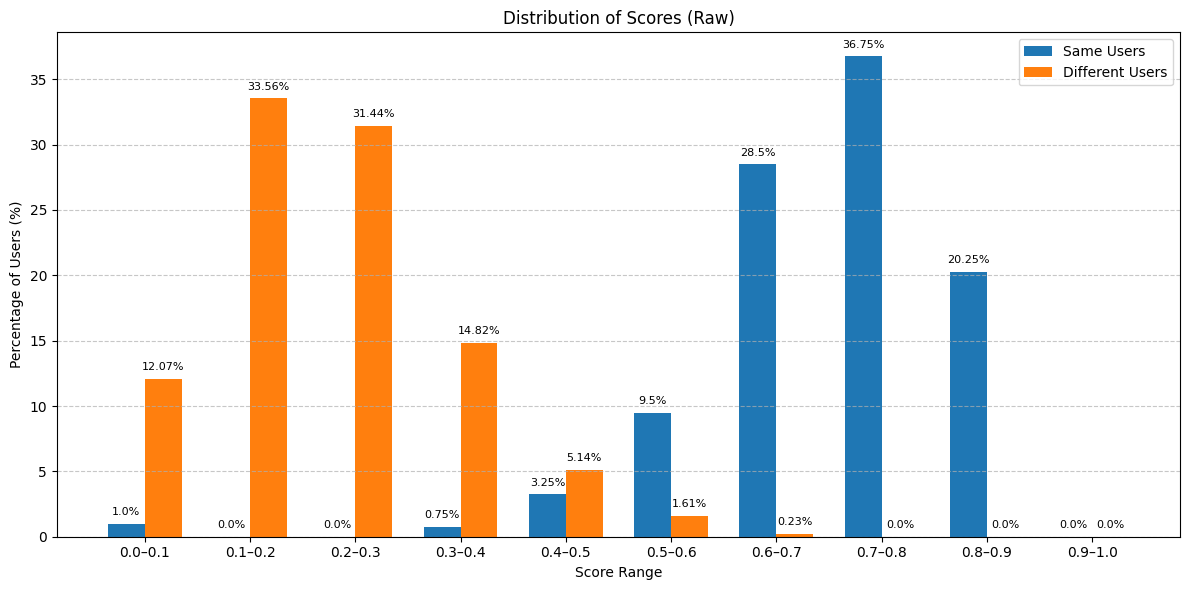

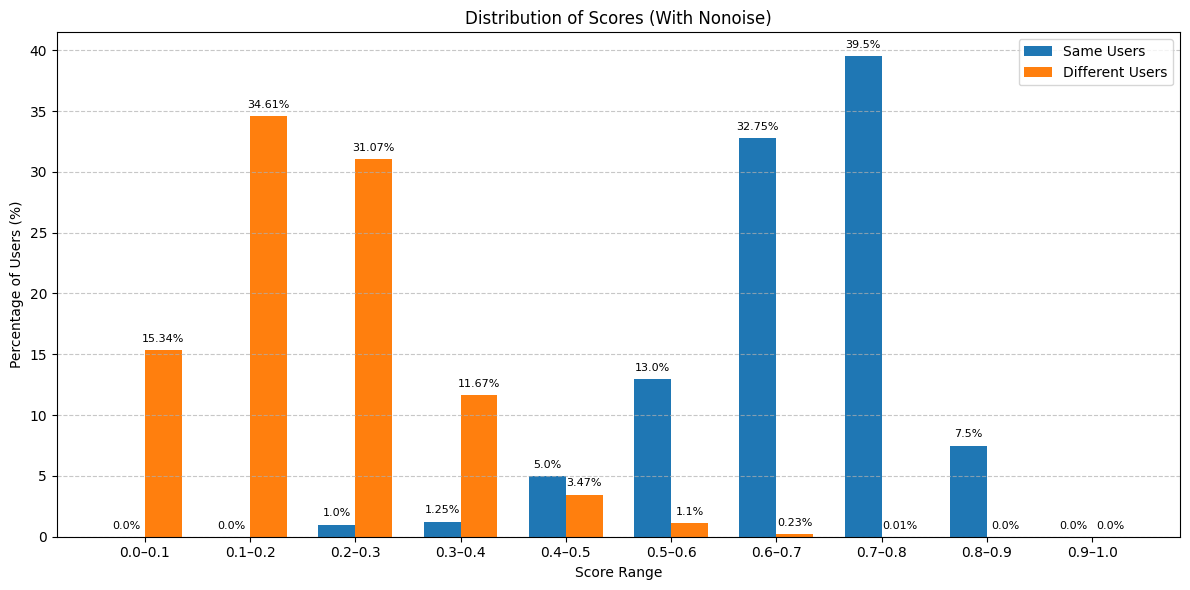

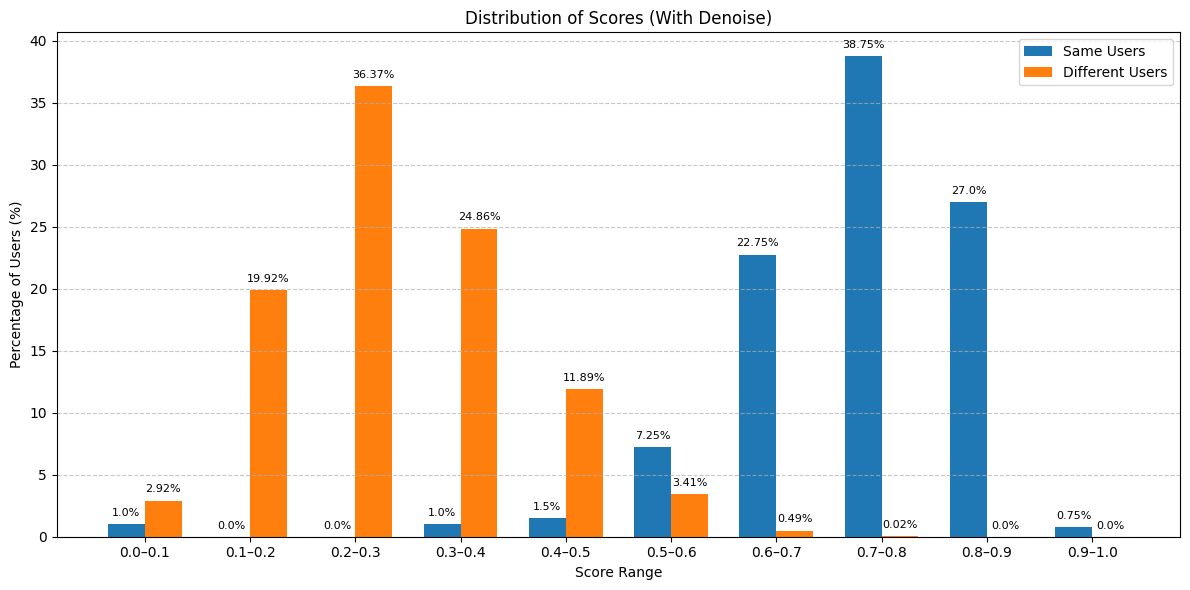

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------
# Plotting function
# ------------------------

def plot_score_distribution(summary_df, score_col_same, score_col_diff, title):
    plt.figure(figsize=(12, 6))
    
    x = summary_df['Range']
    same = summary_df[score_col_same + ' %']
    diff = summary_df[score_col_diff + ' %']
    
    width = 0.35
    indices = np.arange(len(x))
    
    plt.bar(indices - width/2, same, width=width, label='Same Users', color='tab:blue')
    plt.bar(indices + width/2, diff, width=width, label='Different Users', color='tab:orange')
    
    # Adding percentage labels on bars
    for i, (s, d) in enumerate(zip(same, diff)):
        plt.text(i - width/2, s + 0.5, f'{s}%', ha='center', va='bottom', fontsize=8)
        plt.text(i + width/2, d + 0.5, f'{d}%', ha='center', va='bottom', fontsize=8)
    
    plt.xlabel('Score Range')
    plt.ylabel('Percentage of Users (%)')
    plt.title(title)
    plt.xticks(indices, x)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# ------------------------
# Generate plots
# ------------------------

plot_score_distribution(summary_table, 'Same (score)', 'Different (score)', 'Distribution of Scores (Raw)')
plot_score_distribution(summary_table, 'Same (score_with_nonoise)', 'Different (score_with_nonoise)', 'Distribution of Scores (With Nonoise)')
plot_score_distribution(summary_table, 'Same (score_denoise)', 'Different (score_denoise)', 'Distribution of Scores (With Denoise)')


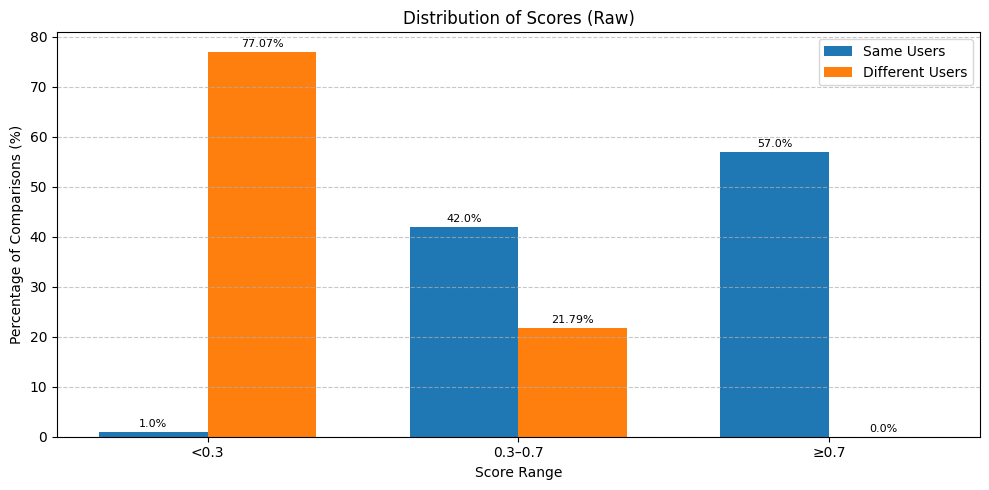

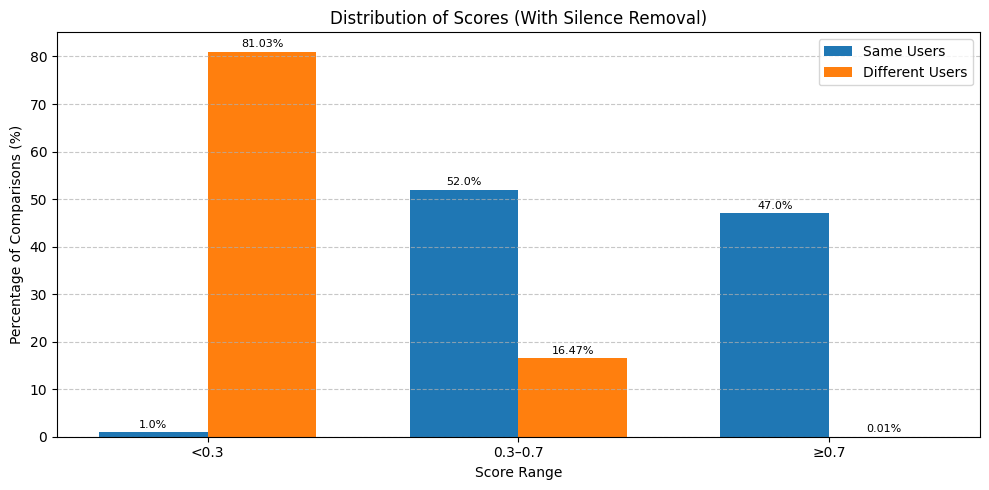

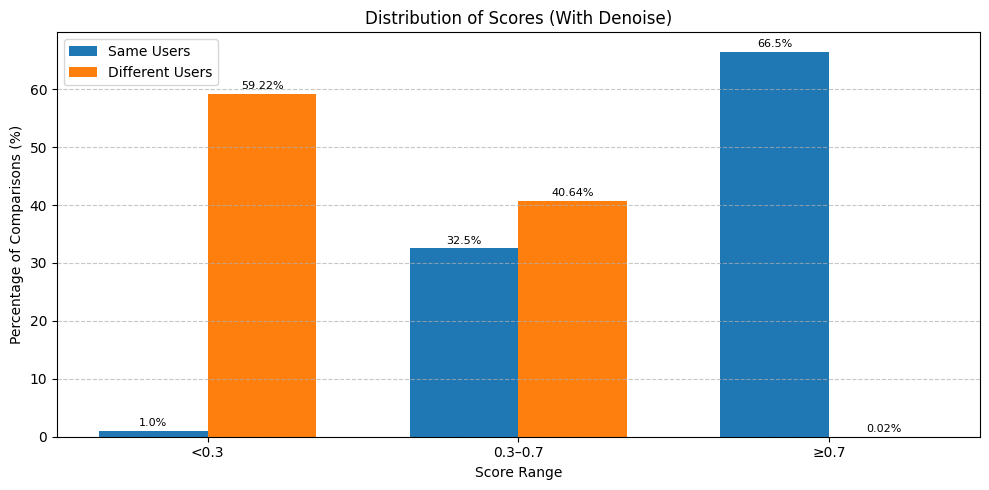

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("Finalverification_scores.csv")

# Step 1: Clean tensor strings to float
def extract_float(col):
    return pd.to_numeric(col.astype(str).str.extract(r'\[(.*?)\]')[0], errors='coerce').fillna(pd.to_numeric(col, errors='coerce'))

df['score'] = extract_float(df['score'])
df['score_with_nonoise'] = extract_float(df['score_with_nonoise'])
df['score_denoise'] = extract_float(df['score_denoise'])

# Step 2: Define new custom bins and labels
bins = [0.0, 0.3, 0.7, 1.0]
labels = ['<0.3', '0.3–0.7', '≥0.7']

# Step 3: Apply binning
df['score_bin'] = pd.cut(df['score'], bins=bins, labels=labels, include_lowest=True)
df['score_with_nonoise_bin'] = pd.cut(df['score_with_nonoise'], bins=bins, labels=labels, include_lowest=True)
df['score_denoise_bin'] = pd.cut(df['score_denoise'], bins=bins, labels=labels, include_lowest=True)

# Step 4: Count bins for same/different users
def count_bins(df, score_bin_col, relation):
    return df[df['user_relation'] == relation][score_bin_col].value_counts().sort_index()

same_score = count_bins(df, 'score_bin', 'same')
diff_score = count_bins(df, 'score_bin', 'different')
same_nonoise = count_bins(df, 'score_with_nonoise_bin', 'same')
diff_nonoise = count_bins(df, 'score_with_nonoise_bin', 'different')
same_denoise = count_bins(df, 'score_denoise_bin', 'same')
diff_denoise = count_bins(df, 'score_denoise_bin', 'different')

# Step 5: Calculate percentages
total_same = len(df[df['user_relation'] == 'same'])
total_diff = len(df[df['user_relation'] == 'different'])

def calc_percent(counts, total):
    return (counts.reindex(labels, fill_value=0).values / total * 100).round(2)

summary_table = pd.DataFrame({
    'Range': labels,

    'Same (score)': same_score.reindex(labels, fill_value=0).values,
    'Same (score) %': calc_percent(same_score, total_same),

    'Different (score)': diff_score.reindex(labels, fill_value=0).values,
    'Different (score) %': calc_percent(diff_score, total_diff),

    'Same (score_with_nonoise)': same_nonoise.reindex(labels, fill_value=0).values,
    'Same (score_with_nonoise) %': calc_percent(same_nonoise, total_same),

    'Different (score_with_nonoise)': diff_nonoise.reindex(labels, fill_value=0).values,
    'Different (score_with_nonoise) %': calc_percent(diff_nonoise, total_diff),

    'Same (score_denoise)': same_denoise.reindex(labels, fill_value=0).values,
    'Same (score_denoise) %': calc_percent(same_denoise, total_same),

    'Different (score_denoise)': diff_denoise.reindex(labels, fill_value=0).values,
    'Different (score_denoise) %': calc_percent(diff_denoise, total_diff),
})

import seaborn as sns

def plot_score_distribution(summary_df, score_col_same, score_col_diff, title):
    plt.figure(figsize=(10, 5))

    x = summary_df['Range']
    same = summary_df[score_col_same + ' %']
    diff = summary_df[score_col_diff + ' %']

    width = 0.35
    indices = np.arange(len(x))

    plt.bar(indices - width/2, same, width=width, label='Same Users', color='tab:blue')
    plt.bar(indices + width/2, diff, width=width, label='Different Users', color='tab:orange')

    for i, (s, d) in enumerate(zip(same, diff)):
        plt.text(i - width/2, s + 0.5, f'{s}%', ha='center', va='bottom', fontsize=8)
        plt.text(i + width/2, d + 0.5, f'{d}%', ha='center', va='bottom', fontsize=8)

    plt.xlabel('Score Range')
    plt.ylabel('Percentage of Comparisons (%)')
    plt.title(title)
    plt.xticks(indices, x)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot all three score distributions
plot_score_distribution(summary_table, 'Same (score)', 'Different (score)', 'Distribution of Scores (Raw)')
plot_score_distribution(summary_table, 'Same (score_with_nonoise)', 'Different (score_with_nonoise)', 'Distribution of Scores (With Silence Removal)')
plot_score_distribution(summary_table, 'Same (score_denoise)', 'Different (score_denoise)', 'Distribution of Scores (With Denoise)')

#import ace_tools as tools; tools.display_dataframe_to_user(name="Grouped Score Summary Table", dataframe=summary_table)
